# Progetto Finale di Introduzione alla Data Science

Autore: Lorenzo La Corte - S4784539

Dataset: **Google Play Store Apps**

## Operazioni Preliminari

Importo le librerie di base:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
# !pip install scipy==1.7.0
import scipy
print (scipy.__version__)

1.7.1


Importo il dataset:

In [2]:
playstore = pd.read_csv('googleplaystore.csv') #importo il file
playstore.head() # visualizza le prime entry del dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Visualizzo numero di righe e di caratteristiche.

In [3]:
playstore.shape # restituisce (numero di righe, numero di colonne)

(10841, 13)

## Pulizia del Dataset 

Divido il dataset in features qualitative e quantitative:

In [4]:
# la [[]] crea dataframe con sezioni di caratteristiche
quantitative_playstore = playstore[['Rating','Reviews','Size','Installs','Price']] 
qualitative_playstore = playstore[['App','Category','Type','Content Rating','Genres', 'Last Updated', 'Current Ver', 'Android Ver']]

Adesso utilizzo il metodo describe() e noto che esso mi restituisce solo Rating come variabile quantitativa.



In [5]:
# quantitative_playstore.describe()
playstore.describe() # mi dovrebbe dare la stessa cosa (solo le quantitative)

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Probabilmente devo pulire la tabella in modo da rendere 'Reviews', 'Size', 'Installs', 'Price' quantitative.

Quindi:
1. Convertire la size delle app a MB per semplificare la visualizzazione
2. Rimuovere il '+' da 'Installs' per renderlo quantitativo
3. Scoprire perché reviews e price non sono quantitative
4. Gestire i valori nulli se ci sono


## Gestione delle Variabili Quantitative

La size risulta non quantitativa: la colonna è composta da stringhe.

Converto quindi queste stringhe in interi per rendere questa caratteristica quantitativa e poi converto la size delle app a MB per semplificare la visualizzazione:

In [6]:
if(type(playstore['Size'][0]) is str):
    playstore = playstore[playstore.Size != "Varies with device"] # rimuovo le righe con questo valore per Size
    playstore['Size'] = [float(x.replace(",",".").replace("+","").replace("M","000000").replace("k","000")) for x in playstore['Size']]
    playstore['Size'] = [(x / 10**6) for x in playstore['Size']]
    
playstore.describe()

,Rating,Size
count,7730.000000,9146.000000
mean,4.175770,19.575341
std,0.570041,24.043197
min,1.000000,0.000001
25%,4.000000,0.000006
50%,4.300000,13.000000
75%,4.500000,30.000000
max,19.000000,100.000000


Rimuovo il '+' da 'Installs' per renderlo quantitativo:

In [7]:
if(type(playstore['Installs'][0]) is str):
    playstore = playstore[playstore.Installs != "Free"] # rimuovo le righe con questo valore per Installs
    playstore['Installs'] = [float(x.replace("+","").replace(",",".").replace(".","")) for x in playstore['Installs']]
    
playstore.describe()

,Rating,Size,Installs
count,7729.000000,9145.000000,9.145000e+03
mean,4.173852,19.577482,7.114842e+06
std,0.544563,24.043640,4.619357e+07
min,1.000000,0.000001,0.000000e+00
25%,4.000000,0.000006,1.000000e+03
50%,4.300000,13.000000,1.000000e+05
75%,4.500000,30.000000,1.000000e+06
max,5.000000,100.000000,1.000000e+09


Analizzo ora le feature Reviews e P

In [8]:
print(type(playstore['Reviews'][0]))
print(type(playstore['Price'][0]))


<class 'str'>
<class 'str'>


Devo convertire anche loro al fine di renderli quantitativi

In [9]:
if(type(playstore['Reviews'][0]) is str):
    playstore['Reviews'] = [float(x.replace("M","000000")) for x in playstore['Reviews']]

if(type(playstore['Price'][0]) is str):
    playstore = playstore[playstore.Price != "Everyone"] # rimuovo le righe con questo valore per Price
    playstore['Price'] = [float(x.replace("$","")) for x in playstore['Price']]

playstore.describe()

,Rating,Reviews,Size,Installs,Price
count,7729.000000,9.145000e+03,9145.000000,9.145000e+03,9145.000000
mean,4.173852,2.490487e+05,19.577482,7.114842e+06,1.184366
std,0.544563,1.716211e+06,24.043640,4.619357e+07,17.355754
min,1.000000,0.000000e+00,0.000001,0.000000e+00,0.000000
25%,4.000000,2.200000e+01,0.000006,1.000000e+03,0.000000
50%,4.300000,7.420000e+02,13.000000,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,30.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,100.000000,1.000000e+09,400.000000


## Gestione dei Valori Nulli

In [10]:
qualitative_playstore.describe()

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10840,10840,10841,10841,10833,10838
unique,9660,34,3,6,120,1378,2832,33
top,ROBLOX,FAMILY,Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,10039,8714,842,326,1459,2451


Notiamo che le colonne hanno piu' o meno tutte lo stesso valore per count, quindi possiamo immaginare ci siano pochi valori nulli per le variabili quantitative, mentre i rating sembrano essere circa mille in meno; verifichiamo con:

In [11]:
# dobbiamo verificare che le entry siano nulle e non NaN o qualcos'altro
playstore.isnull().sum() # ci da tutte le occorrenze nulle

App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Prendiamo in considerazione quindi la colonna "Rating". Abbiamo due soluzioni:
1. Eliminare le righe con elementi nulli oppure
2. Provare a completarle. 

In [12]:
# Soluzione 2 (per Rating)
average_rating = playstore['Rating'].mean()
print(average_rating)
playstore['Rating'].fillna(average_rating, inplace = True) # completa i mancanti con la media degli altri

# Soluzione 1 (per i pochi altri valori nulli)
playstore.dropna(how ='any', inplace = True)

# Risultato
playstore.isnull().sum()

4.173851727260969


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Ho quindi adottato la soluzione del completamento per Rating e di eliminazione per gli altri valori nulli.

Guardiamo ora il dataset:

In [13]:
print(playstore.shape)

playstore.describe()

(9135, 13)


,Rating,Reviews,Size,Installs,Price
count,9135.000000,9.135000e+03,9135.000000,9.135000e+03,9135.000000
mean,4.173922,2.493186e+05,19.596053,7.122458e+06,1.185283
std,0.500775,1.717130e+06,24.049674,4.621827e+07,17.365220
min,1.000000,0.000000e+00,0.000001,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,0.000006,1.000000e+03,0.000000
50%,4.200000,7.420000e+02,13.000000,1.000000e+05,0.000000
75%,4.500000,2.516900e+04,30.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,100.000000,1.000000e+09,400.000000


Abbiamo rimosso circa mille righe ma i valori ora hanno un senso e il dataset è pulito e ordinato: siamo pronti ad una prima analisi delle feature.

# Analisi delle Feature

Cerchiamo di analizzare alcune features, per estrapolare interessanti informazioni su di esse e le loro correlazioni. 

Andiamo inanzitutto a dare un'occhiata alla tabella delle correlazioni.

In [14]:
playstore.corr().style.background_gradient(cmap="Blues")

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.079669,0.078152,0.052583,-0.019652
Reviews,0.079669,1.000000,0.233747,0.627711,-0.009846
Size,0.078152,0.233747,1.000000,0.164542,-0.022822
Installs,0.052583,0.627711,0.164542,1.000000,-0.010489
Price,-0.019652,-0.009846,-0.022822,-0.010489,1.000000


Notiamo:
- una correlazione tra Reviews e Installs,
- una leggera correlazione tra Size e Reviews,
- una leggera correlazione tra Size e Installs.


# Analisi su Rating di App Gratuite o a Pagamento
In questa prima analisi ci concentriamo principalmente sulle feature Rating e Price, pondendoci 3 domande:

1. qual'è la distribuzione dei Rating?

2. qual'è la percentuale di app a pagamento e app gratuite?

3. T-Test: le app gratuite sono piu' gradite (in media) di quelle a pagamento?



(0.995, 1.8]      43
(1.8, 2.6]       127
(2.6, 3.4]       516
(3.4, 4.2]      4338
(4.2, 5.0]      4111
Name: Rating, dtype: int64


<AxesSubplot:>

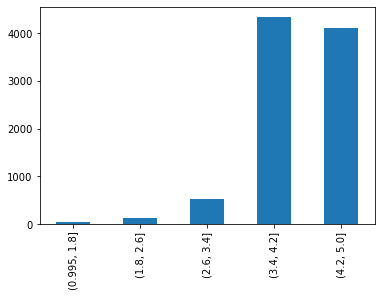

In [15]:
Ratings = playstore['Rating']
Ratings = Ratings.value_counts(bins=5, sort=False) # divido in 20 classi di prezzo 
print(Ratings)
Ratings.plot(kind = 'bar')

Notiamo che la maggior parte delle valutazioni degli utenti sono positive.

Andiamo ora ad osservare la percentuale di app a pagamento e app gratuite.

In [16]:
free_apps = playstore[playstore['Price']==0]
paid_apps = playstore[playstore['Price']>0]

perc_app_gratis = len(free_apps) / playstore.shape[0]
perc_app_pagate = len(paid_apps) / playstore.shape[0]

print("Percentuale di app gratis: " + str(perc_app_gratis))
print("Percentuale di app a pagamento: " + str(perc_app_pagate))

Percentuale di app gratis: 0.9210727969348659
Percentuale di app a pagamento: 0.0789272030651341


### T-Test: le app gratuite sono piu' gradite (in media) di quelle a pagamento?

Formuliamo ora un'ipotesi circa il gradimento di app gratuite e a pagamento, usando la seguente notazione:

H0 = "il gradimento delle app gratuite è maggiore del gradimento delle app a pagamento". 

A questo punto l'ipotesi alternativa è:

HA = "il gradimento delle app gratuite è minore o uguale del gradimento delle app a pagamento". 


Ritengo un app gradita se ha almeno 3.5 di media tra le sue recensioni.


Usiamo un **t-test a una coda** per verificare se l'ipotesi nulla è corretta.

Sappiamo che si devono verificare alcune ipotesi:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

Per applicare al dataset Titanic, prima di tutto verifichiamo quante persone abbiamo nelle varie classi.



In [17]:
campione = free_apps['Rating'].sample(n = 500) # prendo un campione di 500 app scelte casualmente
print("Grandezza campione:\t\t " + str(campione.shape))
print("Media sul campione:\t\t " + str(np.mean(campione)))

popolazione_restante = paid_apps['Rating']
print("Popolazione restante:\t\t " + str(popolazione_restante.shape))
print("Media sulla popolazione restante: " + str(np.mean(popolazione_restante)))

Grandezza campione:		 (500,)
Media sul campione:		 4.168720869452721
Popolazione restante:		 (721,)
Media sulla popolazione restante: 4.237079956623569


*??? le prendo tutte quelle a pagamento o solo un campione??*

Abbiamo considerato un campione di 500 app gratuite, e di 721 app a pagamento. 

Le condizioni del t-test sono quindi verificate, infatti:

Campione = 500 app gratuite;
Popolazione totale = 9135

Quindi le due condizioni sono verificate. 
Eseguiamo il t-test usando la libreria scipy. Scegliamo un intervallo di confidenza pari a 0.95. 

In [18]:
t_statistic, p_value = stats.ttest_1samp(a= campione, popmean= popolazione_restante.mean(),alternative='greater')
print(t_statistic)
print(p_value)

-3.14061852157212
0.9991070375791405


*p-value > livello di confidenza*, infatti: 0.99 > 0.95

H0 è quindi accettata, quindi **il gradimento delle app gratuite è maggiore del gradimento delle app a pagamento**.


# Analisi su Installazioni e Categorie
In questa seconda analisi ci concentriamo principalmente sulle feature Genres e Installs, pondendoci 2 domande:

1. quali sono le categorie con piu' installazioni?

2. t-test: le app di social network e messaggistica sono piu' installate di qualsiasi altra categoria?

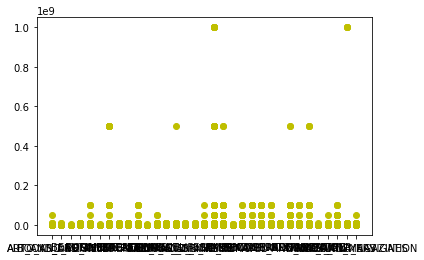

In [19]:
plt.scatter(playstore['Category'], playstore['Installs'], color = 'y') # crea un grafico a dispersione (asse x, asse y)

### T-Test:  le app di social network e messaggistica sono piu' installate di qualsiasi altra categoria?

Formuliamo ora un'ipotesi circa il numero di installazioni di app di networking e messaggistica, usando la seguente notazione:

H0 = "il gradimento delle app gratuite è maggiore del gradimento delle app a pagamento". 

A questo punto l'ipotesi alternativa è:

HA = "il gradimento delle app gratuite è minore o uguale del gradimento delle app a pagamento". 


Ritengo un app gradita se ha almeno 3.5 di media tra le sue recensioni.


Usiamo un **t-test a una coda** per verificare se l'ipotesi nulla è corretta.

Sappiamo che si devono verificare alcune ipotesi:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

Per applicare al dataset Titanic, prima di tutto verifichiamo quante persone abbiamo nelle varie classi.



# Test del chi-quadrato

Ora, supponiamo di avere i dati raccolti da un transatlantico simile al titanic in dimensioni, con tre classi a bordo. Sono stati raccolti i dati di vendite di diversi viaggi (totale di 10000 biglietti), ottenendo le seguenti stime: il 25% dei biglietti che saranno acquistati sara' in prima classe, il 15% in seconda classe, e il 60% in terza. 

Noi abbiamo ora questo campione (il dataset) e vogliamo verificare se la vendita di biglietti del titanic segua la stessa statistica di vendita del secondo transatlantico, oppure sia differente.

Quindi ipotesi nulla:

H0 = Le vendite di biglietti del titanic seguono la stessa statistica dell'altro transatlantico.
HA = La distribuzione in classi passeggero e' diversa. 


Costruiamo una tabella di conteggi:

In [20]:
# conteggi attesi

total_passengers = titanic.shape[0]
classi_Attese = [int(np.round(total_passengers*0.25)),int(np.round(total_passengers*0.15)),int(total_passengers*0.60)]
print(classi_Attese)

data = {'Prima classe': [216,classi_Attese[0]], 'Seconda classe': [184, classi_Attese[1]], 'Terza classe': [491, classi_Attese[2]]}
df = pd.DataFrame(data)
df.index = ['Observed', 'Expected']
print(df)


NameError: name 'titanic' is not defined

Vi viene in mente un test statistico che possiamo utilizzare?

Usiamo un Chi-quadrato per l'idoneita'. 
Condizioni. 
1. Abbiamo almeno 5 conteggi? SI;
2. Le singole osservazioni sono indipendenti e le dimensioni della popolazione devono essere pari ad almeno 10 volte quelle del campione (10n < N). Verificata, abbiamo 10000 biglietti.


Usiamo Python e la libreria scipy nuovamente:

In [ ]:
observed = [216,184,491]
expected = [223,134,534]
chi_squared, p_value = stats.chisquare(f_obs= observed, f_exp= expected)

print(chi_squared)
print(p_value)

Il p_value ottenuto e' inferiore al livello di significativita' fissato, quindi possiamo rigettare l'ipotesi nulla, in favore del fatto che la distribuzione di vendita' e' differente rispetto all'altro transatlantico. 

**Compito per casa**
Da fonte wikipedia, ritroviamo che: 

* *I passeggeri a bordo del titanic erano 1317: 324 in prima classe, 284 in seconda e 709 in terza*

Ripetere il test chi-quadrato, verificando se le occorrenze nel dataset che abbiamo a dispozione rispecchiano questa ulteriore fonte di informazione.  

# Analisi su Prezzo e Categorie
In questa terza analisi ci concentriamo principalmente sulle feature Genres e Price:

Dividiamo il dataset in 4 categorie di prezzo:
 
- gratis
- sotto i 20 dollari
- tra i 20 e i 100 dollari
- sopra i 100 dollari

Eseguiamo un **test del chi-quadrato**, con le seguenti ipotesi:

H0 = Il prezzo delle applicazioni nella categoria Family segue la stessa statistica della categoria .

HA = La distribuzione dei prezzi e' diversa. 

In [21]:
free_apps = playstore[playstore['Price']==0]
cheap_apps = playstore[playstore['Price']>0 and playstore['Price']<=20]
affordable_apps =  playstore[playstore['Price']>20 and playstore['Price']<=100]
expensive_apps = playstore[playstore['Price']>100]

perc_free_apps = len(free_apps) / playstore.shape[0]
perc_cheap_apps = len(cheap_apps) / playstore.shape[0]
perc_affordable_apps = len(affordable_apps) / playstore.shape[0]
perc_expensive_apps = len(expensive_apps) / playstore.shape[0]

print("Percentuale di app gratis: " + str(perc_free_apps))
print("Percentuale di app a pagamento: " + str(perc_cheap_apps))
print("Percentuale di app a pagamento: " + str(perc_affordable_apps))
print("Percentuale di app a pagamento: " + str(perc_expensive_apps))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().